# Handwritten Digits Recognition with CNN
Handwritten digits recognition in deep learning involves training a neural network to accurately classify images of handwritten digits into their corresponding numerical values (0-9). This task typically involves preprocessing the images, designing a neural network architecture (like convolutional neural networks), training the model on a dataset of labeled handwritten digits (such as MNIST), and optimizing its parameters using techniques like backpropagation and gradient descent. The goal is to develop a model that can generalize well to recognize unseen handwritten digits with high accuracy.

<div class="alert alert-success">
    <h2>Table of content</h2>
    <ol>
        <li><a href="#Project-goal">Project goal</a></li>
        <li><a href="#Applicable-domains">Applicable domains</a></li>
        <li><a href="#Stakeholders">Stakeholders</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Tools-and-technology">Tools and technology</a></li>
        <li><a href="#Applicable-domains">Applicable domains</a></li>
        <li><a href="#Load-Data-sets">Load Data sets</a></li>
        <li><a href="#Basic-analysis-about-the-datasets">Basic analysis about the datasets</a></li>
        <li><a href="#What's-we-have-in-the-dataset?">What's we have in the dataset?</a></li>
        <li>
            <a href="#Data-pre-processing">Data pre-processing</a>
            <ol>
                <li><a href="#Normalizing">Normalizing</a></li>
                <li><a href="#Reshaping">Reshaping</a></li>
            </ol>
        </li>        
        <li><a href="#Defining-the-model">Defining the model</a></li>
        <li><a href="#Model-accuracy">Model accuracy</a></li>
    </ol>
</div>

## Project goal
The main goal of this project is implementing more accurate handwritten character recognition system. In this Notebook I will be developing a CNN model to recognize handwritten digits. In the future I will extend this project to recognize handwritten characters as well.

## Applicable domains
<ul>
    <li>Digitized Document Processing</li>
    <li>Automatic Address Recognition</li>
    <li>Banking and Finance</li>
    <li>Education</li>
    <li>Security</li>
    <li>Medical Records</li>
    <li>Data Analysis and Machine Learning</li>
</ul>

## Stakeholders
<ul>
    <li>Researchers and Developers</li>
    <li>Technology Companies</li>
    <li>Educational Institutions</li>
    <li>Financial Institutions</li>
    <li>Healthcare Providers</li>
    <li>Retail and E-commerce Companies</li>
</ul>

## Dataset
In this project I'm using EMNIST dataset. More specifically, EMNIST-Digits subset.

## Tools and technology
<ul>
    <li>Convolutinal Neural Network</li>
    <li>Keras with Tensorflow backend</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.saving import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, RMSprop

%matplotlib inline

## Load Data sets

In [3]:
train_set_orig = pd.read_csv('data/emnist-digits-train.csv')
test_set_orig = pd.read_csv('data/emnist-digits-test.csv')

#(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
img_size = 28
#train_X = train_X.reshape(train_X.shape[0], img_size, img_size, 1)
#test_X = test_X.reshape(test_X.shape[0], img_size, img_size, 1)

#train_y = to_categorical(train_y)
#test_y = to_categorical(test_y)

In [6]:
#train_X

## Basic analysis about the datasets

In [7]:
#print('Train set shape:', train_X.shape)
#print('Test set shape:', test_X.shape)

print('Train set shape:', train_set_orig.shape)
print('Test set shape:', test_set_orig.shape)

Train set shape: (239999, 785)
Test set shape: (39999, 785)


Train : Test ratio is good. 18799 observations for testing is a very good number compared to 112799 records for training.

In [8]:
train_set_orig.isna().sum().any()

False

In [9]:
test_set_orig.isna().sum().any()

False

There are no any missing values in either sets.

## What's we have in the dataset?

In [10]:
# Train set input features X and class y
train_X = train_set_orig.iloc[:, 1:].values
train_y = train_set_orig.iloc[:, 0].values

# Test set input features and class y
test_X = test_set_orig.iloc[:, 1:].values
test_y = test_set_orig.iloc[:, 0].values

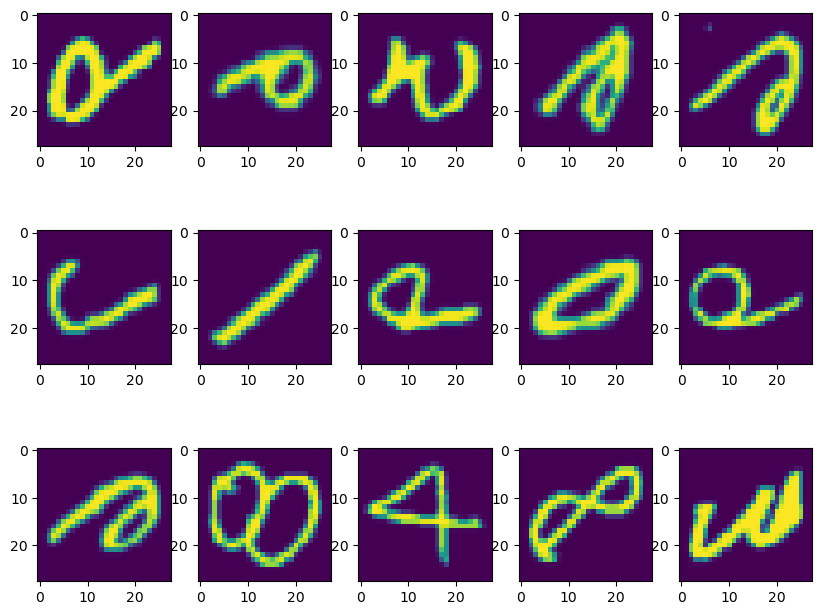

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_X[i].reshape([28, 28]))

plt.show()

## Data pre-processing
If you look at the data set, the range of the pixel values goes from 0 to 255. It is a good idea to normalize data before we feed them into a model for training. Normalizing data helps to increase the efficiency of training process.

### Normalizing

In [12]:
train_X = train_X / 255.
test_X = test_X / 255.

### Reshaping
Pixel values are stored in the CSV file as a single row. We have to reshape it to a bunch of (28, 28, 1) images.

In [13]:
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

In [14]:
number_of_classes = 10
train_y = to_categorical(train_y, number_of_classes)
test_y = to_categorical(test_y, number_of_classes)

## Defining the model

In [50]:
model = Sequential([
    Conv2D(32, 3, input_shape=(img_size, img_size, 1), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Conv2D(256, 3, activation='relu', kernel_initializer='he_uniform'),
    #Dropout(0.2),
    Conv2D(128, 3, activation='relu', kernel_initializer='he_uniform'),
    #MaxPooling2D(2, 2),
    Flatten(),
    #Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(number_of_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 256)       73984     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         295040    
                                                                 
 flatten_1 (Flatten)         (None, 10368)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                103690    
                                                      

In [51]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model_filepath = 'models/model-mnist-digits-ep{epoch:03d}-loss{loss:.3f}'
cp = ModelCheckpoint(model_filepath, verbose=1, save_best_only=True, monitor='accuracy')
no_epochs = 20

In [53]:
model.fit(train_X, train_y, epochs=no_epochs, batch_size=32, validation_data=[test_X, test_y], callbacks=[cp])

Epoch 1/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9852
Epoch 1: accuracy improved from -inf to 0.98523, saving model to models\model-mnist-digits-ep001-loss0.050
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep001-loss0.050\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep001-loss0.050\assets


7500/7500 [==============================] - 304s 40ms/step - loss: 0.0505 - accuracy: 0.9852 - val_loss: 0.0264 - val_accuracy: 0.9922
Epoch 2/20
7499/7500 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9938
Epoch 2: accuracy improved from 0.98523 to 0.99380, saving model to models\model-mnist-digits-ep002-loss0.022
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep002-loss0.022\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep002-loss0.022\assets


7500/7500 [==============================] - 311s 41ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.0187 - val_accuracy: 0.9949
Epoch 3/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9954
Epoch 3: accuracy improved from 0.99380 to 0.99540, saving model to models\model-mnist-digits-ep003-loss0.016
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep003-loss0.016\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep003-loss0.016\assets


7500/7500 [==============================] - 304s 41ms/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.0185 - val_accuracy: 0.9949
Epoch 4/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9963
Epoch 4: accuracy improved from 0.99540 to 0.99633, saving model to models\model-mnist-digits-ep004-loss0.013
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep004-loss0.013\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep004-loss0.013\assets


7500/7500 [==============================] - 305s 41ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0179 - val_accuracy: 0.9952
Epoch 5/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9970
Epoch 5: accuracy improved from 0.99633 to 0.99704, saving model to models\model-mnist-digits-ep005-loss0.010
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep005-loss0.010\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep005-loss0.010\assets


7500/7500 [==============================] - 301s 40ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0178 - val_accuracy: 0.9951
Epoch 6/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9977
Epoch 6: accuracy improved from 0.99704 to 0.99769, saving model to models\model-mnist-digits-ep006-loss0.008
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep006-loss0.008\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep006-loss0.008\assets


7500/7500 [==============================] - 303s 40ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0172 - val_accuracy: 0.9955
Epoch 7/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9980
Epoch 7: accuracy improved from 0.99769 to 0.99805, saving model to models\model-mnist-digits-ep007-loss0.007
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep007-loss0.007\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep007-loss0.007\assets


7500/7500 [==============================] - 303s 40ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0182 - val_accuracy: 0.9954
Epoch 8/20
7499/7500 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9985
Epoch 8: accuracy improved from 0.99805 to 0.99852, saving model to models\model-mnist-digits-ep008-loss0.006
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep008-loss0.006\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep008-loss0.006\assets


7500/7500 [==============================] - 305s 41ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0186 - val_accuracy: 0.9955
Epoch 9/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9988
Epoch 9: accuracy improved from 0.99852 to 0.99877, saving model to models\model-mnist-digits-ep009-loss0.005
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep009-loss0.005\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep009-loss0.005\assets


7500/7500 [==============================] - 295s 39ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0215 - val_accuracy: 0.9947
Epoch 10/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9991
Epoch 10: accuracy improved from 0.99877 to 0.99910, saving model to models\model-mnist-digits-ep010-loss0.003
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep010-loss0.003\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep010-loss0.003\assets


7500/7500 [==============================] - 297s 40ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0200 - val_accuracy: 0.9952
Epoch 11/20
7499/7500 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9994
Epoch 11: accuracy improved from 0.99910 to 0.99936, saving model to models\model-mnist-digits-ep011-loss0.002
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep011-loss0.002\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep011-loss0.002\assets


7500/7500 [==============================] - 299s 40ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0211 - val_accuracy: 0.9953
Epoch 12/20
7500/7500 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994
Epoch 12: accuracy improved from 0.99936 to 0.99940, saving model to models\model-mnist-digits-ep012-loss0.002
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep012-loss0.002\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep012-loss0.002\assets


7500/7500 [==============================] - 301s 40ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0222 - val_accuracy: 0.9952
Epoch 13/20
7499/7500 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996
Epoch 13: accuracy improved from 0.99940 to 0.99961, saving model to models\model-mnist-digits-ep013-loss0.002
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep013-loss0.002\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep013-loss0.002\assets


7500/7500 [==============================] - 296s 39ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0248 - val_accuracy: 0.9954
Epoch 14/20
7499/7500 [============================>.] - ETA: 0s - loss: 9.8032e-04 - accuracy: 0.9998
Epoch 14: accuracy improved from 0.99961 to 0.99976, saving model to models\model-mnist-digits-ep014-loss0.001
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep014-loss0.001\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep014-loss0.001\assets


7500/7500 [==============================] - 306s 41ms/step - loss: 9.8025e-04 - accuracy: 0.9998 - val_loss: 0.0279 - val_accuracy: 0.9945
Epoch 15/20
7500/7500 [==============================] - ETA: 0s - loss: 9.1585e-04 - accuracy: 0.9998
Epoch 15: accuracy did not improve from 0.99976
7500/7500 [==============================] - 303s 40ms/step - loss: 9.1585e-04 - accuracy: 0.9998 - val_loss: 0.0241 - val_accuracy: 0.9957
Epoch 16/20
7500/7500 [==============================] - ETA: 0s - loss: 7.3223e-04 - accuracy: 0.9998
Epoch 16: accuracy improved from 0.99976 to 0.99983, saving model to models\model-mnist-digits-ep016-loss0.001
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep016-loss0.001\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep016-loss0.001\assets


7500/7500 [==============================] - 307s 41ms/step - loss: 7.3223e-04 - accuracy: 0.9998 - val_loss: 0.0259 - val_accuracy: 0.9952
Epoch 17/20
7499/7500 [============================>.] - ETA: 0s - loss: 7.4961e-04 - accuracy: 0.9998
Epoch 17: accuracy did not improve from 0.99983
7500/7500 [==============================] - 290s 39ms/step - loss: 7.4951e-04 - accuracy: 0.9998 - val_loss: 0.0257 - val_accuracy: 0.9954
Epoch 18/20
7499/7500 [============================>.] - ETA: 0s - loss: 2.6059e-04 - accuracy: 1.0000
Epoch 18: accuracy improved from 0.99983 to 0.99996, saving model to models\model-mnist-digits-ep018-loss0.000
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep018-loss0.000\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep018-loss0.000\assets


7500/7500 [==============================] - 287s 38ms/step - loss: 2.6056e-04 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 0.9960
Epoch 19/20
7500/7500 [==============================] - ETA: 0s - loss: 6.9679e-05 - accuracy: 1.0000
Epoch 19: accuracy improved from 0.99996 to 1.00000, saving model to models\model-mnist-digits-ep019-loss0.000
INFO:tensorflow:Assets written to: models\model-mnist-digits-ep019-loss0.000\assets


INFO:tensorflow:Assets written to: models\model-mnist-digits-ep019-loss0.000\assets


7500/7500 [==============================] - 286s 38ms/step - loss: 6.9679e-05 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 0.9961
Epoch 20/20
7500/7500 [==============================] - ETA: 0s - loss: 4.2487e-05 - accuracy: 1.0000
Epoch 20: accuracy did not improve from 1.00000
7500/7500 [==============================] - 284s 38ms/step - loss: 4.2487e-05 - accuracy: 1.0000 - val_loss: 0.0262 - val_accuracy: 0.9962


In [54]:
model_file = 'models/model-mnist-digits-ep019-loss0.000'
model_obj = load_model(model_file)

In [21]:
#_, val_accuracy = model_obj.evaluate(test_X, test_y)

In [22]:
#val_accuracy

## Model accuracy

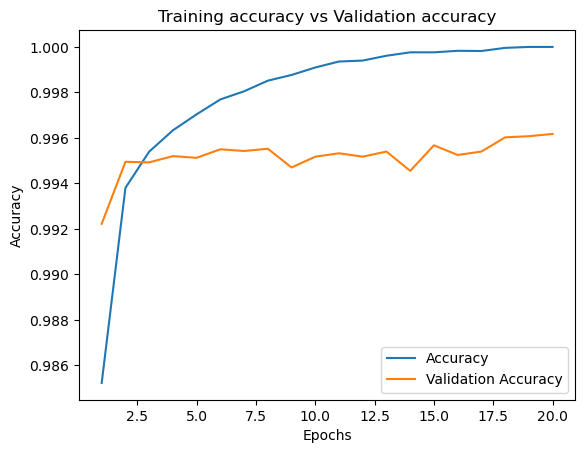

In [55]:
accuracy_plot_x = range(1, no_epochs + 1)
accuracy_values = model.history.history['accuracy']
val_accuracy_values = model.history.history['val_accuracy']
sns.lineplot(x=accuracy_plot_x, y=accuracy_values, label='Accuracy')
sns.lineplot(x=accuracy_plot_x, y=val_accuracy_values, label='Validation Accuracy')

plt.title('Training accuracy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [58]:
image_file = 'sample_images/1.png'
image = load_img(image_file, color_mode="grayscale", target_size=(28, 28))
image_array = img_to_array(image)
image_array = image_array.reshape(1, 28, 28, 1)
image_array = image_array / 255.0

In [59]:
np.argmax(model_obj.predict(image_array))

1/1 [==============================] - 0s 18ms/step


7